In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
survey_data = pd.read_csv('nls_emp_survey.csv')

In [3]:
survey_data

,Response,Employee_ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,1,810081,6,3,5,4,3,6,5,3,5,4,6,4
1,2,512221,2,5,3,3,6,2,3,5,3,2,2,3
2,3,177541,3,2,3,5,2,3,3,2,3,6,3,6
3,4,679938,3,5,3,3,6,2,2,5,2,2,3,2
4,5,777934,3,5,3,5,6,4,4,5,4,6,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,626499,3,2,3,5,1,3,3,2,3,6,3,5
596,597,781937,3,6,3,5,6,4,4,5,4,6,3,5
597,598,788719,3,5,3,5,6,4,4,5,4,6,3,5
598,599,212141,3,2,3,5,2,3,3,2,3,6,3,5


In [4]:
# Extract relevant survey columns for PCA
survey_responses = survey_data.iloc[:, 2:]

In [9]:
# Standardize the data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(survey_responses)

In [10]:
# Apply PCA
pca = PCA()
pca_results = pca.fit_transform(scaled_data)

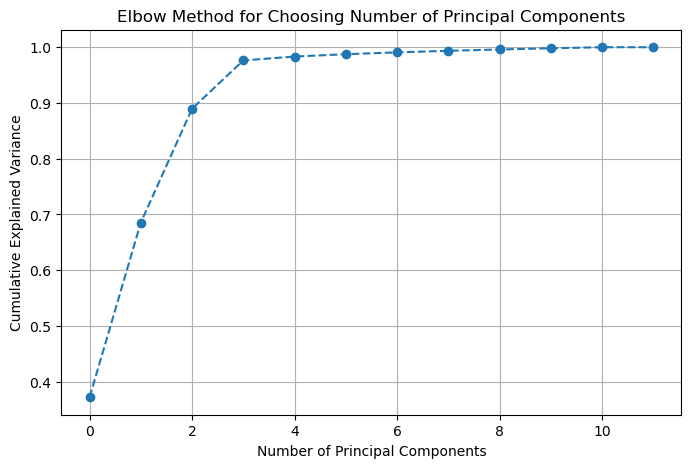

In [11]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio to apply the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Choosing Number of Principal Components')
plt.grid(True)
plt.show()

In [21]:
# Extracting the PCA loadings (components)
loadings = pca.components_.T

# Creating a DataFrame for the loadings with features as rows and PCs as columns
all_loadings_df = pd.DataFrame(
    data=loadings,
    columns=[f'PC{i+1}' for i in range(loadings.shape[1])],
    index=survey_responses.columns
)
all_loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Q1,0.377841,0.224249,-0.115196,-0.357202,-0.027824,-0.377597,0.147696,0.009394,0.007303,0.014827,0.023578,-7.071068e-01
Q2,-0.253190,0.276803,0.383411,-0.213789,-0.013124,0.003765,0.045597,0.127882,0.459144,-0.659940,0.040145,2.775558e-16
Q3,0.351393,0.251104,-0.138598,-0.356234,0.049858,0.751025,-0.304280,-0.067082,-0.008995,-0.034620,-0.049681,-1.942890e-16
Q4,0.072333,-0.445143,0.198855,-0.311536,-0.486822,0.089384,-0.006558,0.631054,-0.116429,0.051592,-0.023319,-4.163336e-17
Q5,-0.260122,0.267763,0.382000,-0.221837,-0.002444,-0.076255,-0.127828,-0.140555,-0.784702,-0.073497,0.049283,-1.734723e-16
Q6,0.366604,0.029642,0.343320,0.282507,0.018812,-0.227827,-0.682999,0.080038,0.112877,0.046582,0.356342,1.387779e-17
Q7,0.361852,0.033165,0.360231,0.273266,0.029664,-0.019944,0.061169,-0.003594,-0.059887,-0.091904,-0.804026,-0.000000e+00
Q8,-0.237301,0.288001,0.393521,-0.195376,0.011486,0.045639,0.046428,0.010984,0.335004,0.736643,-0.091389,-1.387779e-17
Q9,0.355177,0.024317,0.375288,0.250666,-0.055231,0.283121,0.602802,-0.093015,-0.078781,0.010038,0.456122,-9.714451e-17
Q10,0.043768,-0.457583,0.195117,-0.284303,-0.310746,-0.047849,-0.086211,-0.732470,0.157249,-0.037628,-0.029358,5.551115e-17


In [22]:
# Using 3 principal components for detailed analysis
pca_3 = PCA(n_components=3)
pca_data_3 = pca_3.fit_transform(scaled_data)

# Create a DataFrame for principal component loadings
pc_loadings_df = pd.DataFrame(
    pca_3.components_.T,
    columns=['PC1', 'PC2', 'PC3'],
    index=survey_responses.columns
)
pc_loadings_df

,PC1,PC2,PC3
Q1,0.377841,0.224249,-0.115196
Q2,-0.253190,0.276803,0.383411
Q3,0.351393,0.251104,-0.138598
Q4,0.072333,-0.445143,0.198855
Q5,-0.260122,0.267763,0.382000
Q6,0.366604,0.029642,0.343320
Q7,0.361852,0.033165,0.360231
Q8,-0.237301,0.288001,0.393521
Q9,0.355177,0.024317,0.375288
Q10,0.043768,-0.457583,0.195117



# PC1: job-oriented Training and Skill Improvement

Strong positive loadings on Q1, Q3, Q6, Q7, Q9, and Q11, indicating that this component is strongly associated with questions focused on aspects such as job enhancement, knowledge expansion, and overall satisfaction with skills development.
This suggests that PC1 primarily captures engagement and motivation related to job-oriented training and skill improvement.

# PC2: Personal Growth and Networking

Notable positive loadings on Q2, Q5, and Q8, with negative loadings on Q4 and Q10.
This component seems to emphasize motivational aspects related to personal growth and networking, contrasted with aversion to non-relevant training activities.

# PC3: General Enthusiasm in job-oriented Training and Skill Improvement and Personal Growth and Networking

Strong loadings on Q2, Q5, Q8, Q6, Q7, and Q9.
PC3 appears to capture general enthusiasm for training opportunities and potential growth, with variations in intensity or enthusiasm.


In [ ]:
# Determine the optimal number of clusters using the elbow method 
# Calculate Within-Cluster Sum of Squares (WSS) for a range of cluster numbers
from sklearn.cluster import KMeans
wss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data_3)  
    wss.append(kmeans.inertia_)

# Plotting the elbow method result
plt.figure(figsize=(8, 6))
plt.plot(k_values, wss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('wss')
plt.grid(True)
plt.show()


In [ ]:
#Perform KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42,max_iter=100, n_init=10)
clusters = kmeans.fit_predict(pca_data_3)
# Add cluster labels to the original data for analysis
survey_data['Cluster'] = clusters
# Display the distribution of responses by clusters
cluster_counts = survey_data['Cluster'].value_counts().sort_index()
# Visualize the cluster distribution
plt.figure(figsize=(8, 5))
plt.bar(cluster_counts.index, cluster_counts.values, tick_label=[f'Cluster {i}' for i in cluster_counts.index])
plt.xlabel('Cluster')
plt.ylabel('Number of Responses')
plt.title('Distribution of Responses Across 4 Clusters')
plt.grid(axis='y')
plt.show()

# Display the cluster counts
survey_data['Cluster'].value_counts()

In [ ]:
# Display the cluster centers in terms of principal components
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(
    cluster_centers,
    columns=['PC1', 'PC2', 'PC3'],
    index=[f'Cluster {i}' for i in range(4)]
)
cluster_sizes = pd.Series(kmeans.labels_).value_counts(normalize=True).sort_index()
cluster_centers_df['size'] = cluster_sizes.values
cluster_centers_df = cluster_centers_df.sort_values('size', ascending = False)
cluster_centers_df.rename(columns={'PC1': 'Job-oriented training and Skill improvement', 'PC2': 'Personal Growth and Networking', 
                                   'PC3' : 'General Enthusiasm'}, inplace=True)
# Display the cluster centers
cluster_centers_df

# Cluster 0: 
- Primary Characteristics: High positive value on PC3, with moderate negative values on PC1 and PC2.
- Interpretation: Employees in this cluster show a strong enthusiasm for training opportunities in general. While they may not be particularly motivated by training that is directly job-related (low PC1) or personal and networking-focused (low PC2), they are enthusiastic about broad learning opportunities. This cluster might represent employees who see training as a way to develop in diverse areas, valuing the training process itself over specific outcomes.

# Cluster 1: 
- Primary Characteristics: Strong positive values on PC1 and PC2, with a slightly negative value on PC3.
- Interpretation: This cluster represents employees who are highly motivated by both job-oriented and personal growth elements of training. They value training that is closely tied to improving their job performance (high PC1) and are also interested in opportunities that foster personal growth and professional connections (high PC2). This group likely represents highly driven employees who see training as a way to advance their careers holistically.

# Cluster 2
- Primary Characteristics: Strong negative value on PC1, high positive value on PC2, and moderately negative value on PC3.
- Interpretation: These employees are interested in personal growth and networking (high PC2) but show a low focus on job-specific training benefits (negative PC1). They may prefer training that opens up new opportunities or provides general professional development over training directly linked to their current roles. This group could represent employees who are seeking broader, perhaps less conventional growth paths.

# Cluster 3
- Primary Characteristics: Negative values across PC1, PC2, and PC3.
- Interpretation: This cluster may represent employees with a generally lower engagement or enthusiasm for training. They may not be strongly motivated by job-specific improvements (negative PC1), personal growth, or networking opportunities (negative PC2 and PC3). This group might include employees who either prefer limited or highly targeted training or are more indifferent to training initiatives overall.

In [ ]:
# next is to explore location difference
employees_data = pd.read_csv('nls_employees.csv')
local_offices_data = pd.read_csv('nls_local_offices.csv')
regional_centers_data = pd.read_csv('nls_regional_centers.csv')

In [ ]:
# Merging survey data with employee data to get office information
survey_with_employees = pd.merge(survey_data, employees_data[['Employee_ID', 'Office_ID']], on='Employee_ID', how='left')

# Merging with local offices data to get regional center information
survey_with_offices = pd.merge(survey_with_employees, local_offices_data[['Office_ID', 'Regional_Center_ID']], on='Office_ID', how='left')

# Merging with regional centers data
survey_with_regionals = pd.merge(survey_with_offices, regional_centers_data[['Regional_Center_ID', 'Regional_Center']], on='Regional_Center_ID', how='left')

# Displaying the merged data to verify the connections
survey_with_regionals.head()

In [ ]:
# Grouping data by clusters and local offices to analyze distribution at a more granular level
# cluster_office_summary = survey_with_regionals.groupby(['Cluster', 'Office_ID']).size().reset_index(name='Count')
# cluster_office_summary

In [ ]:
# Grouping data by clusters and region center to analyze distribution at a more granular level
## could change the regional_Center to more where the center locates in North America for clear communication，e.g. LA- south east
cluster_regional_summary = survey_with_regionals.groupby(['Cluster', 'Regional_Center']).size().reset_index(name='Count')
cluster_regional_summary

In [ ]:
#can ignore the graph cuz the colors are not matching
plt.figure(figsize=(14, 8))
colors = sns.color_palette('tab20', len(cluster_regional_summary['Cluster'].unique()))  # Color palette
for i, cluster in enumerate(sorted(cluster_regional_summary['Cluster'].unique())):
    subset = cluster_regional_summary[cluster_regional_summary['Cluster'] == cluster]
    plt.bar(subset['Regional_Center'], subset['Count'], label=f'Cluster {cluster}', alpha=0.7, color=colors[i])

plt.xlabel('Regional Center')
plt.ylabel('Count of Employees')
plt.title('Distribution of Clusters Across Regional Center')
plt.legend()
plt.xticks(rotation=90)
plt.show()